<a href="https://colab.research.google.com/github/syahidarbi/Customer-Clustering-with-Unsupervised-Learning/blob/main/Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from pandas.core.common import random_state

# Data overview

In [ ]:
# Import dataset
df = pd.read_csv("/content/drive/MyDrive/Portofolio/Marketing Campaign/marketing_campaign_data (1).csv")

In [ ]:
# Melihat sample data yang ada pada dataset
df.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
471,471,1581,1980,S1,Menikah,37406000.0,1,0,10-10-2013,18,...,8,0,0,0,0,0,0,3,11,1
1334,1334,2535,1978,S2,Menikah,88097000.0,1,0,18-08-2012,24,...,9,0,1,1,1,0,0,3,11,1
1902,1902,5896,1987,S2,Menikah,73395000.0,0,0,18-03-2014,94,...,2,0,0,0,0,0,0,3,11,0


In [ ]:
# Melihat nama kolom, jumlah data serta type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
# Melakukan pengecekan jumlah data kosong(null)
null=pd.DataFrame(df.isnull().sum())
print('Berikut ini merupakan kolom yang memiliki nilai null beserta jumlahnya')
print('-'*50)
null[null[0]>0]

Berikut ini merupakan kolom yang memiliki nilai null beserta jumlahnya
--------------------------------------------------


,0
Income,24


In [ ]:
# Melakukan pengecekan data duplikat
df['ID'].duplicated().any()

False

In [ ]:
# Membagi data berdasarkan type data numerik ataupun kategorik
numDf = df.select_dtypes('number').columns.tolist()
catDf = df.select_dtypes('object').columns.tolist()

print('columns with dtype number is :', numDf)
print('columns with dtype object is :', catDf)

columns with dtype number is : ['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
columns with dtype object is : ['Education', 'Marital_Status', 'Dt_Customer']


In [ ]:
# Melihat statistika dasar pada kolom numerik
df[numDf].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


In [ ]:
# Melihat statistik dasar pada kolom bersifat kategorik
df[catDf].describe().T

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Dt_Customer,2240,663,31-08-2012,12


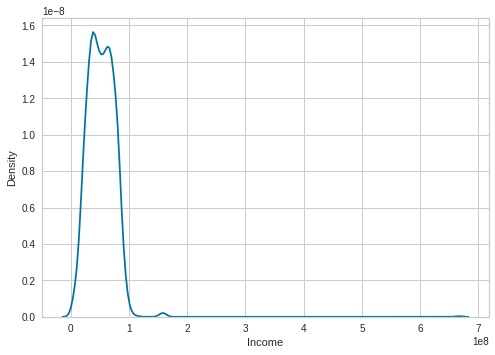

In [ ]:
# Melihat distribusi data pada kolom income sebagai observasi awal untuk mengisi nilai null 
sns.kdeplot(x=df['Income'])

**Ringkasan hasil observasi**
1. Kolom Unnamed : 0 merupakan kolom yang tidak memberikan informasi apapun
2. Data terdiri dari 30 kolom dan 2240 baris
3. Terdapat 2 buah kolom bertype kategorik dan 28 kolom bertype numerik
4. Terdapat 24 nilai null pada kolom income
5. Dataset tidak memiliki nilai yang duplikat
6. Data Year_Birth dapat kita ubah menjadi Age untuk mempermudah observasi
7. Data KidHome dan TeenHome dapat kita gabungkan menjadi total anak
8. Data Dt_customer dapat kita ambil angka tahunnya saja
9. Data Z_CostContact dan Z_Revenue memiliki 1 nilai yang sama
10. Sebaran data pada kolom income bersifat right skew sehingga nilai nullnya dapat kita isi dengan median
11. Data outlier dapat kita observasi lebih lanjut untuk mengurangi kesalahan dalam analisa 



**Langkah yang perlu dilakukan untuk data cleaning:**
1. Drop kolom Unnamed : 0
2. Isi nilai null pada kolom income dengan median
3. Extract kolom Year_Birth menjadi data umur
4. Jumlahkan data KidHome dan TeenHome menjadi data total anak
5. Extract kolom Dt_customer menjadi tahun join
6. Melakukan pengecekan dan handling pada nilai outlier

# Cleaning data

In [ ]:
# Membuat salinan dataset original untuk dibersihkan
CleanDf = df.copy()

In [ ]:
# Drop kolom Unnamed: 0
CleanDf = CleanDf.drop(columns='Unnamed: 0')

In [ ]:
# Isi nilai null pada kolom Income
CleanDf['Income'] = CleanDf['Income'].fillna(CleanDf['Income'].median())

In [ ]:
# Extract kolom Year_Birth menjadi umur
CleanDf['Age']= 2022-CleanDf['Year_Birth']
# Buang kolom Year_Birth
CleanDf=CleanDf.drop(columns='Year_Birth')

In [ ]:
# Membuat kolom MemberHome dengan menjumlahkan Kidhome dan Teenhome
CleanDf['MemberHome'] = CleanDf['Kidhome']+CleanDf['Teenhome']
# Buang kolom KidHome dan TeenHome
CleanDf=CleanDf.drop(columns=['Kidhome', 'Teenhome'])

In [ ]:
# Extract Dt_Customer menjadi tahun join
CleanDf['YearJoin'] = CleanDf['Dt_Customer'].str.split('-').str[-1].astype('int')
# Buang kolom Dt_Customer
CleanDf=CleanDf.drop(columns='Dt_Customer')

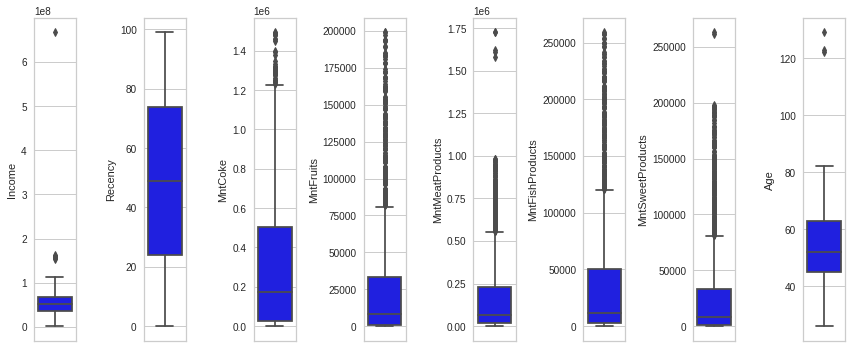

In [ ]:
# Inisialisasi kolom yang mungkin berisi nilai outlier
NumOut=['Income','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','Age']
# Visualisasikan kedalam boxplot untuk mengidentifikasi nilai yang jauh dari sebaran datanya
plt.figure(figsize=(12, 5))
for i in range(len(NumOut)):
    plt.subplot(1,8,i+1)
    sns.boxplot(y = CleanDf[NumOut[i]], color='blue', orient='v')
    plt.tight_layout()

Hasil visualisasi menunjukan bahwa data yang teridentifikasi outlier yaitu
1. income diatas 130000000
2. MntMeatProducts diatas 1500000
3. MntSweetProducts diatas 250000
4. Umur di atas 120 tahun

*Nilai outlier dapat juga diatasi menggunakan teknik lainnya yaitu IQR ataupun z_score. akan tetapi kali ini kita melakukan identifikasi secara manual*

In [ ]:
# Lakukan filtering pada data data outlier
DataOut = CleanDf[(CleanDf['Income']>=130000000) | 
                  (CleanDf['MntMeatProducts']>=1500000) | 
                  (CleanDf['MntSweetProducts']>=250000) | 
                  (CleanDf['Age']>=120)]
# Cek jumlah data yang terfilter
print('Jumlah data yang terfilter ada sebanyak ' + str(DataOut.shape[0]) + ' baris')

Jumlah data yang terfilter ada sebanyak 15 baris


In [ ]:
# Buang data yang telah terfilter
CleanDf = CleanDf.drop(DataOut.index)

In [ ]:
# Data setelah di bersihkan
CleanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2225 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2225 non-null   int64  
 1   Education            2225 non-null   object 
 2   Marital_Status       2225 non-null   object 
 3   Income               2225 non-null   float64
 4   Recency              2225 non-null   int64  
 5   MntCoke              2225 non-null   int64  
 6   MntFruits            2225 non-null   int64  
 7   MntMeatProducts      2225 non-null   int64  
 8   MntFishProducts      2225 non-null   int64  
 9   MntSweetProducts     2225 non-null   int64  
 10  MntGoldProds         2225 non-null   int64  
 11  NumDealsPurchases    2225 non-null   int64  
 12  NumWebPurchases      2225 non-null   int64  
 13  NumCatalogPurchases  2225 non-null   int64  
 14  NumStorePurchases    2225 non-null   int64  
 15  NumWebVisitsMonth    2225 non-null   i

# Exploratory Data Analysis

In [ ]:
# Membuat salinan data untuk keperluan analisa
EdaDf = CleanDf.copy()

In [ ]:
# Definisikan kolom untuk analisa
Profile = ['Education', 'Marital_Status', 'Income', 'Age', 'MemberHome', 'YearJoin'] #Data profil customer
Mnt = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] #Data spending customer
Purchase =['Recency', 'NumWebVisitsMonth', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'] #Data aktivitas customer
Campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5'] #Data respon campaign sebelumnya
Target = ['Response'] #Data respon campaign terakhir

## Response

In [ ]:
# Persentase Response = 1
ResponseRatio=EdaDf[EdaDf['Response']==1].shape[0]/df.shape[0]*100

print('Rasio respon = 1 yaitu sebanyak ', round(ResponseRatio, 2), '%')

Rasio respon = 1 yaitu sebanyak  14.91 %


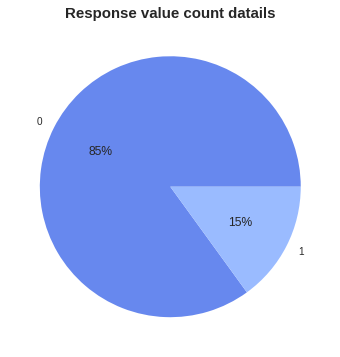

In [ ]:
plt.figure(figsize=(6,6))
#define data
data = EdaDf['Response'].value_counts().tolist()
labels = EdaDf['Response'].value_counts().index.tolist()
#define Seaborn color palette to use
colors = sns.color_palette('coolwarm')
#create pie chart
plt.pie(data,
        labels=labels, 
        colors = colors,
        autopct='%.0f%%')
# Adding Title of chart
plt.title('Response value count datails', fontsize = 15, fontweight = 'bold')
plt.show()

Rasio conversion rate respon terhadap campaign terakhir yaitu sebesar 14,91%

## Amount Spent (Keyword Mnt)

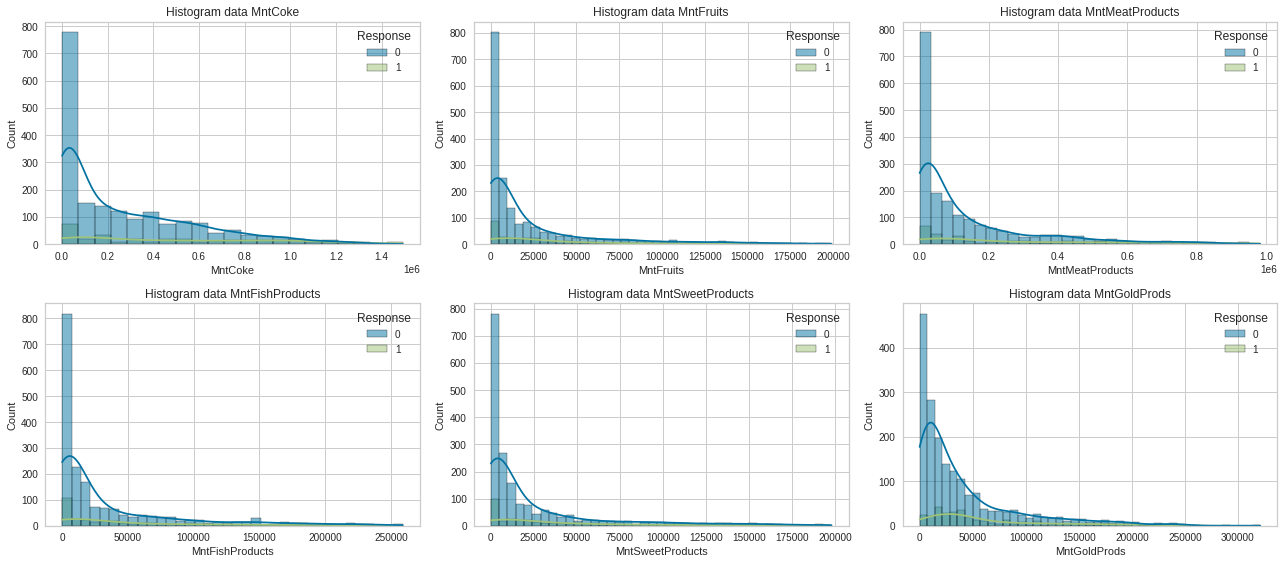

In [ ]:
# Histogram data MntProduct
plt.figure(figsize=(18, 8))
for i in range(len(Mnt)):
    plt.subplot(2,3,i+1)
    sns.histplot(x = EdaDf[Mnt[i]], 
                 hue=EdaDf['Response'],
                 kde=True)
    plt.title('Histogram data '+str(Mnt[i]) )
    plt.tight_layout()

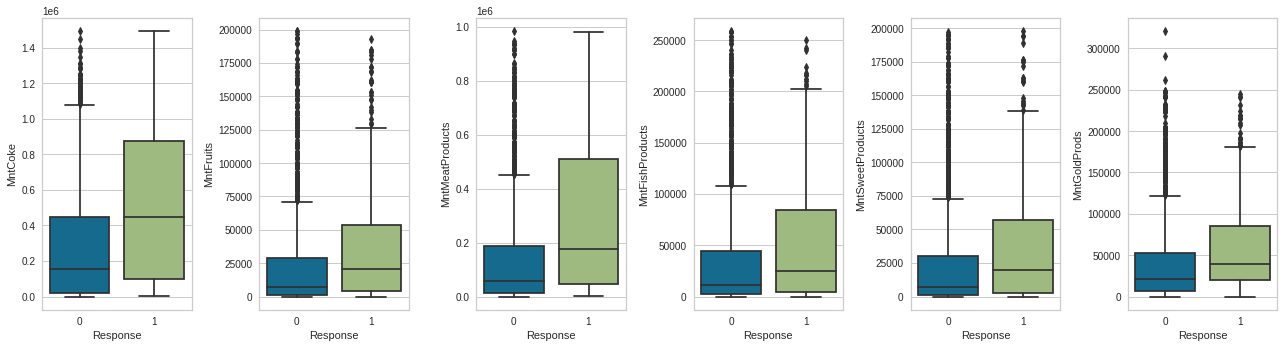

In [ ]:
plt.figure(figsize=(18, 5))
for i in range(len(Mnt)):
    plt.subplot(1,6,i+1)
    sns.boxplot(y = EdaDf[Mnt[i]], 
                 x=EdaDf['Response'])
    plt.tight_layout()

In [ ]:
ResSpend = round(EdaDf.groupby(['Response'])[Mnt]
                 .agg('mean'),2).T.sort_values(by=[0,1],ascending=False).reset_index()
Spending = pd.DataFrame(round(CleanDf[Mnt].mean(), 2),
                        columns=['Mean']).sort_values(by='Mean', ascending=False).reset_index()
Spending.merge(ResSpend, how='right', on='index')

,index,Mean,0,1
0,MntCoke,305520.00,270692.23,502703.59
1,MntMeatProducts,164080.90,141071.39,294353.29
2,MntGoldProds,44017.98,40939.71,61446.11
3,MntFishProducts,37702.47,35168.16,52050.90
4,MntSweetProducts,26972.13,24912.22,38634.73
5,MntFruits,26393.26,24307.24,38203.59


Text(0, 0.5, 'Amount spent on...')

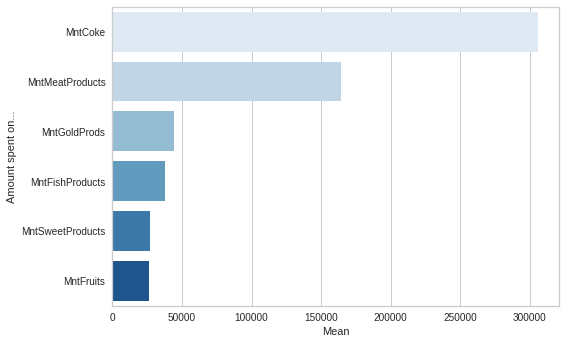

In [ ]:
ax = sns.barplot(x=Spending['Mean'], y=Spending['index'], data=Spending, palette='Blues')
plt.ylabel('Amount spent on...')

1. Semua data amount spent product memiliki nilai skew ke kanan
2. Amount spent tertinggi terdapat pada produk Coke memiliki yang memiliki nilai rata-rata lebih dari 300000 atau setara dengan 50% dari total Amount Spent keseluruhan
3. Amount spent  dengan respon = 1 memiliki nilai rata rata yang lebih tinggi dari nilai rata rata amount spent setiap produk 

## Recency, NumWebVisit, NumPurchase

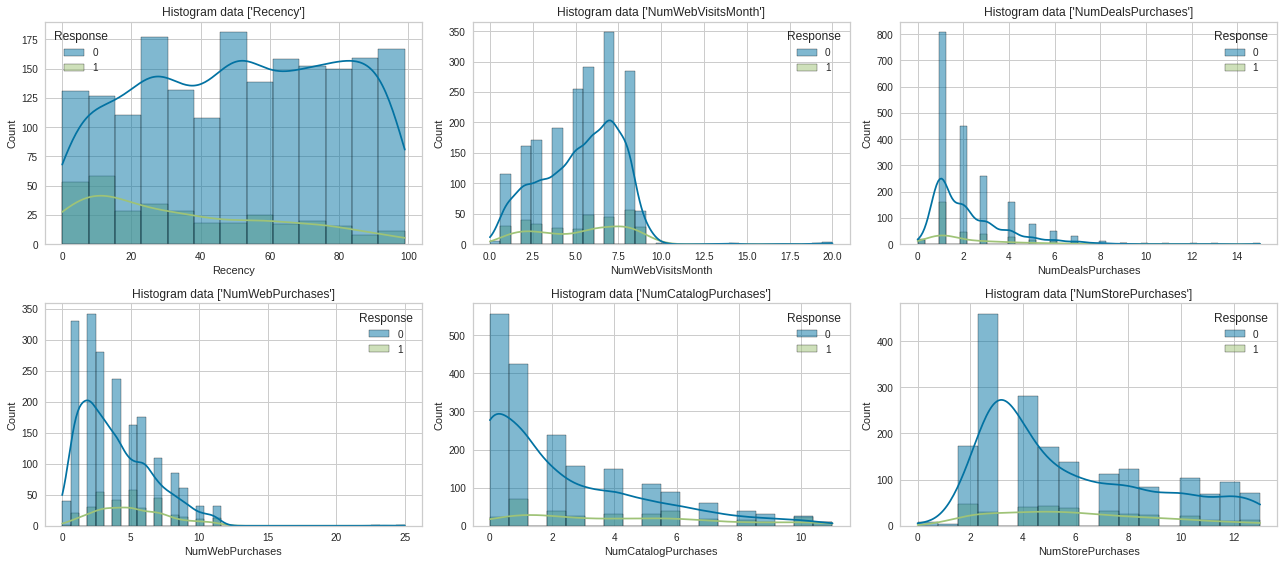

In [ ]:
plt.figure(figsize=(18, 8))
for i in range(len(Purchase)):
    plt.subplot(2,3,i+1)
    sns.histplot(x = EdaDf[Purchase[i]], 
                 hue=EdaDf['Response'],
                 kde=True)
    plt.title('Histogram data '+str([Purchase[i]]))
    plt.tight_layout()

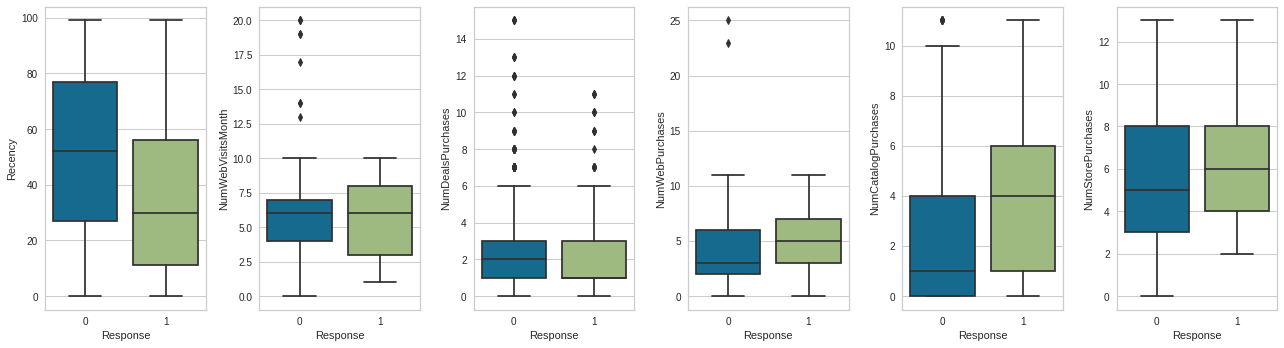

In [ ]:
plt.figure(figsize=(18, 5))
for i in range(len(Purchase)):
    plt.subplot(1,6,i+1)
    sns.boxplot(y = EdaDf[Purchase[i]], 
                 x=EdaDf['Response'])
    plt.tight_layout()

In [ ]:
ResChannel = round(EdaDf.groupby(['Response'])[Purchase]
                   .agg('mean'),2).T.sort_values(by=[0,1], ascending=False).reset_index()
Channel = pd.DataFrame(round(df[Purchase].mean(), 2), 
                       columns=['Mean']).sort_values(by='Mean', ascending=False).reset_index()

Channel.merge(ResChannel, how='right', on='index')

,index,Mean,0,1
0,Recency,49.11,51.57,35.38
1,NumStorePurchases,5.79,5.77,6.10
2,NumWebVisitsMonth,5.32,5.35,5.29
3,NumWebPurchases,4.08,3.91,5.07
4,NumCatalogPurchases,2.66,2.35,4.20
5,NumDealsPurchases,2.33,2.31,2.34


Text(0, 0.5, 'Number of...')

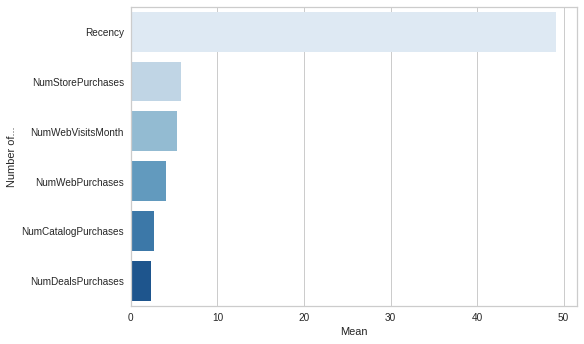

In [ ]:
ax = sns.barplot(x=Channel['Mean'], y=Channel['index'], data=Channel, palette='Blues')
plt.ylabel('Number of...')

1. Rata rata nilai recency keseluruhan customer berada di angka 49 hari
2. Rata rata nilai recency customer yang merespon campaign terakhir berada di angka 35 hari
3. Urutan berdasarkan jumlah purchase terbanyak yaitu : Store, Web, Catalog dan Deals 
4. NumCatalogPurchase yang semakin banyak cendrung respon terhadap campaigin

## Campaign

In [ ]:
ResCmp = (round(EdaDf.groupby(['Response'])[Campaign].
                agg('mean'),4)*100).T.sort_values(by=[0,1], ascending=False).reset_index()
Cmp = (pd.DataFrame(round(df[Campaign].mean(), 4), 
                    Camcolumns=['Mean']).sort_values(by='Mean', ascending=False)*100).reset_index()

Cmp.merge(ResCmp, how='right', on='index')

,index,Mean,0,1
0,AcceptedCmp4,7.46,5.50,18.56
1,AcceptedCmp3,7.28,4.55,23.05
2,AcceptedCmp5,7.28,3.70,27.54
3,AcceptedCmp1,6.43,3.44,23.65
4,AcceptedCmp2,1.34,0.53,5.99


Text(0, 0.5, 'Rasio AcceptedCmp (%)')

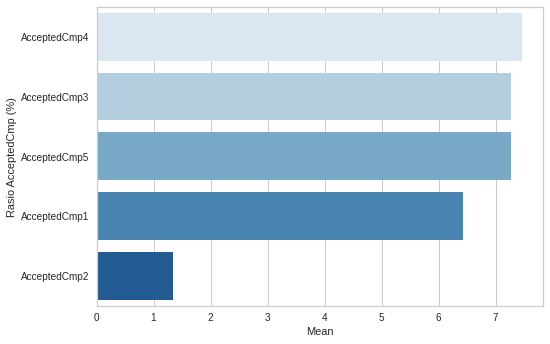

In [ ]:
ax = sns.barplot(x=Cmp['Mean'], y=Cmp['index'], data=Cmp, palette='Blues')
plt.ylabel('Rasio AcceptedCmp (%)')

1. Rasio keberhasilan pada campaign sebelumnya berada pada rentang 1.35% hingga 7.46%
2. Rasio tingkat keberhasilan pada campaign  2 merupakan yang paling buruk diantara yang lainnya.

In [ ]:
CmpTot = EdaDf.groupby(['Response','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                        'AcceptedCmp4', 'AcceptedCmp5'])['ID'].agg(['count'])
CmpTot['ratio'] = round(CmpTot.groupby(level=0).apply(lambda x: x / x.sum())['count'],4)*100
CmpTot = CmpTot.reset_index().sort_values(by=['Response','ratio'], ascending=False)
CmpTot.head(3)

,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,count,ratio
16,1,0,0,0,0,0,146,43.71
20,1,0,0,1,0,0,55,16.47
17,1,0,0,0,0,1,21,6.29


1. Ratio nilai respon = 1 dan respon = 0 paling banyak terjadi ketika AccCmp 1-5 bernilai 0 
2. Ratio nilai respon = 1 ketika AccCmp 1-5 bernilai 0 memiliki proporsi 44% atau 146 dari 334
3. Ratio nilai respon = 0 ketika AccCmp 1-5 bernilai 0 memilik proporsi 86% atau 1618 dari 1891 saat

## YearJoin

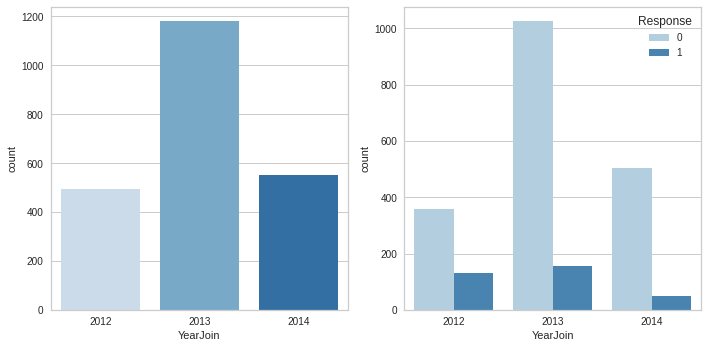

In [ ]:
#YearJoin Response

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = EdaDf['YearJoin'],
              palette='Blues')

plt.subplot(1,2,2)
sns.countplot(x = EdaDf['YearJoin'], 
              hue=EdaDf['Response'],
              palette='Blues')
plt.tight_layout()

Customer yang join pada tahun 2012 cendrung memiliki rasio nilai Response pada campaign terakhir lebih tinggi dibandingkan yang lainnya

## Income

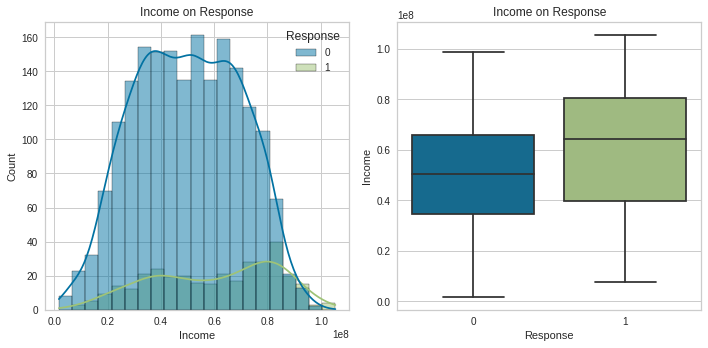

In [ ]:
plt.figure(figsize=(10,5))
#histogram
plt.subplot(1,2,1)
sns.histplot(x=EdaDf['Income'], hue=EdaDf['Response'], kde=True)
plt.title('Income on Response')
#boxplot
plt.subplot(1,2,2)
sns.boxplot(x=EdaDf['Response'], y=EdaDf['Income'])
plt.title('Income on Response')
plt.tight_layout()

1. Data income memiliki nilai yang terdistribusi cukup normal
2. Income yang lebih tinggi memiliki kecendrungan untuk Respon pada campaign

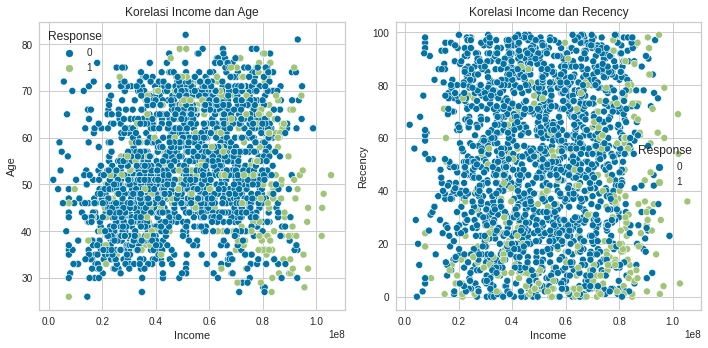

In [ ]:
plt.figure(figsize=(10,5))

#Age
plt.subplot(1,2,1)
sns.scatterplot(x=EdaDf['Income'], 
                y=EdaDf['Age'],
                hue=EdaDf['Response'])
plt.title('Korelasi Income dan Age', loc='center')
#Recency
plt.subplot(1,2,2)
sns.scatterplot(x=EdaDf['Income'], 
                y=EdaDf['Recency'],
                hue=EdaDf['Response'])
plt.title('Korelasi Income dan Recency', loc='center')
plt.tight_layout()

Income tidak berkorlasi yang signifikan terhadap data umur ataupun recency

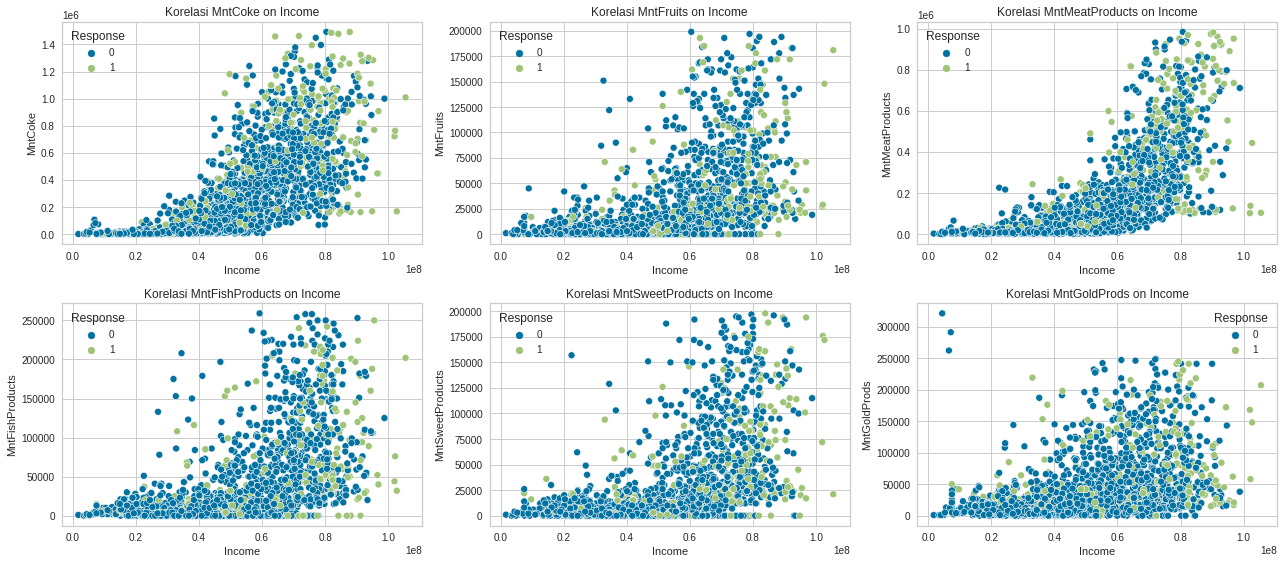

In [ ]:
plt.figure(figsize=(18,8))
for i in range(len(Mnt)):
  plt.subplot(2,3,i+1)
  sns.scatterplot(x=EdaDf['Income'], 
              y=EdaDf[Mnt[i]], 
              hue=EdaDf['Response'])
  plt.title('Korelasi ' + str(Mnt[i]) + ' on Income')
  plt.tight_layout()

Semakin tinggi income diketahui memiliki amaount spent product yang semakin tinggi pula, terutama pada produk meat dan coke 

## Age

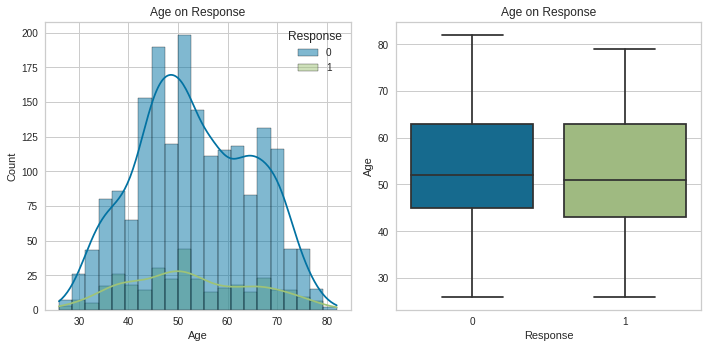

In [ ]:
plt.figure(figsize=(10,5))
#histogram
plt.subplot(1,2,1)
sns.histplot(x=EdaDf['Age'],
             hue=EdaDf['Response'],
             kde=True)
plt.title('Age on Response')
#boxplot
plt.subplot(1,2,2)
sns.boxplot(x=EdaDf['Response'], 
            y=EdaDf['Age'])
plt.title('Age on Response')

plt.tight_layout()

1. Data Age memiliki nilai yang terdistribusi cukup normal
2. Age memiliki kecendrungan tidak berpengaruh terhadap Respon pada campaign

## MemberHome

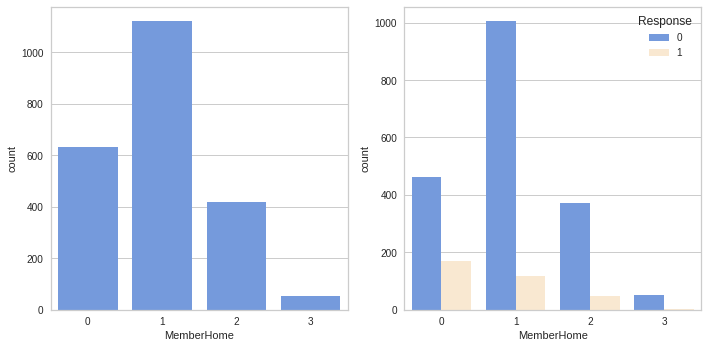

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=EdaDf['MemberHome'], color='#6495ED')
plt.subplot(1,2,2)
sns.countplot(x=EdaDf['MemberHome'], hue=EdaDf['Response'], palette=['#6495ED','#ffe9cb'])
plt.tight_layout()

1. Customer yang ada di dominasi oleh customer dengan MemberHome = 1
2. Customer dengan MemberHome = 0 memiliki rasio Respon pada campaign lebih tinggi dari yang lainnya

Text(0.5, 1.0, 'Age on MemberHome')

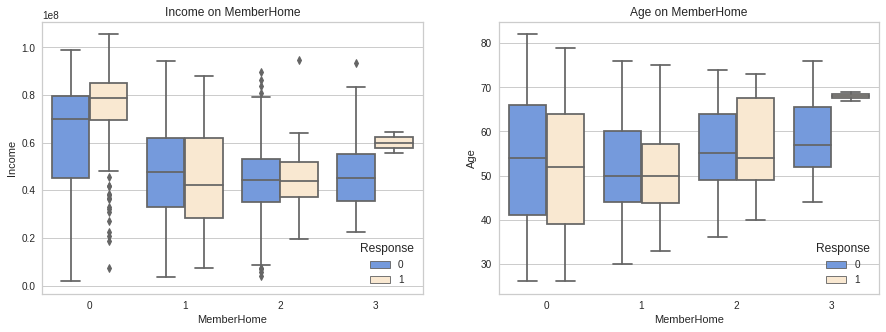

In [ ]:
plt.figure(figsize=(15,5))
plt.tight_layout
# Income
plt.subplot(1,2,1)
sns.boxplot(x=EdaDf['MemberHome'], y=EdaDf['Income'], hue=EdaDf['Response'], palette=['#6495ED','#ffe9cb'])
plt.title('Income on MemberHome')
#Age
plt.subplot(1,2,2)
sns.boxplot(x=EdaDf['MemberHome'], y=EdaDf['Age'], hue=EdaDf['Response'], palette=['#6495ED','#ffe9cb'])
plt.title('Age on MemberHome')

a. Income
  1. Income pada MemberHome yang lebih sedikit memiliki rentang dan rata-rata lebih tinggi dibandingkan yang lainnya
  2. Pada MemberHome = 1 dan 3, Income yang lebih tinggi cendrung untuk respon terhadap campaign

b. Age
  1. Semakin banyak MemberHome diketahui memiliki umur yang semakin tua

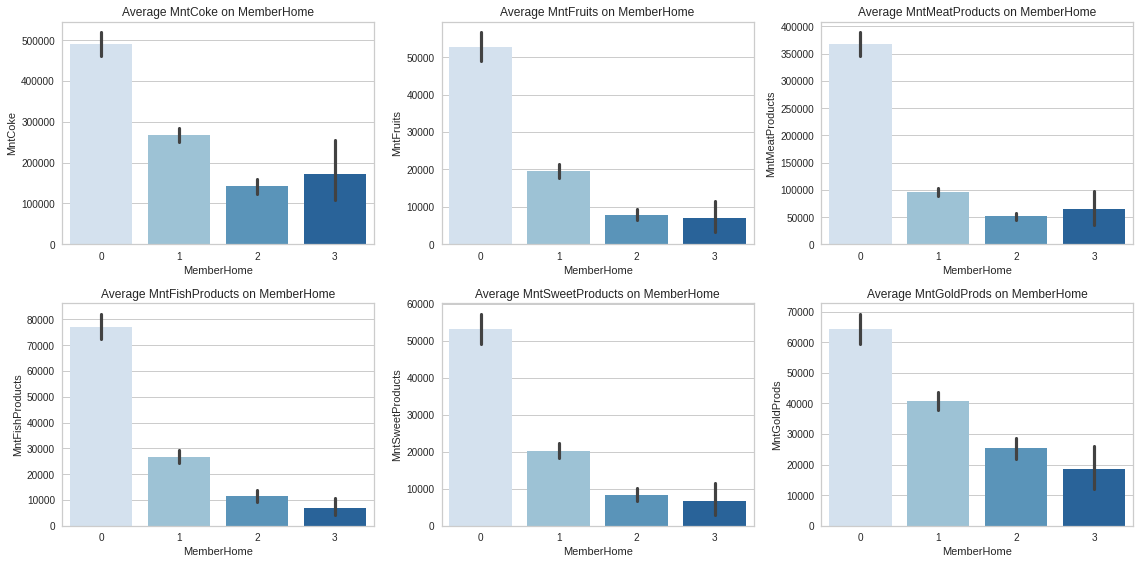

In [ ]:
# Memberhome dan Mnt
plt.figure(figsize=(16,8))
for i in range(len(Mnt)):
  plt.subplot(2,3,i+1)
  sns.barplot(x=EdaDf['MemberHome'], y=EdaDf[Mnt[i]], 
              #hue=EdaDf['Response'], 
              estimator=np.mean, palette='Blues')
  plt.title('Average ' + str(Mnt[i]) + ' on MemberHome')
  plt.tight_layout()

In [ ]:
MemberHomeMnt=round(EdaDf.groupby(['MemberHome'])[Mnt].agg(['count', 'median', 'mean', 'std', 'min', 'max']),2)

MemberHomeMnt

MntCoke                                                MntFruits  \
             count    median       mean        std   min      max     count   
MemberHome                                                                    
0              631  456000.0  491361.33  368639.74     0  1493000       631   
1             1121  143000.0  268621.77  313673.04     0  1492000      1121   
2              420   51000.0  141726.19  200958.04  1000  1459000       420   
3               53   33000.0  171377.36  279219.39  2000  1279000        53   

                                         ... MntSweetProducts                \
             median      mean       std  ...             mean       std min   
MemberHome                               ...                                  
0           33000.0  52675.12  50377.94  ...         53117.27  50664.93   0   
1            6000.0  19451.38  31886.79  ...         20180.20  33654.22   0   
2            2000.0   7895.24  16593.65  ...          8388.10  18611.96   0   
3            1000.0   6905.66  16187.92  ...          6622.64  16698.95   0   

                   MntGoldProds                                           
               max        count   median      mean       std min     max  
MemberHome                                                                
0           198000          631  43000.0  64454.83  59825.86   0  262000  
1           195000         1121  21000.0  40662.80  48742.70   0  321000  
2           150000          420  13000.0  25476.19  35796.52   0  291000  
3           102000           53   9000.0  18603.77  25215.49   0  108000  

[4 rows x 36 columns]

MemberHome yang lebih sedikit diketahui memiliki Nilai amount spent yang cendrung lebih tinggi pada hampir semua product

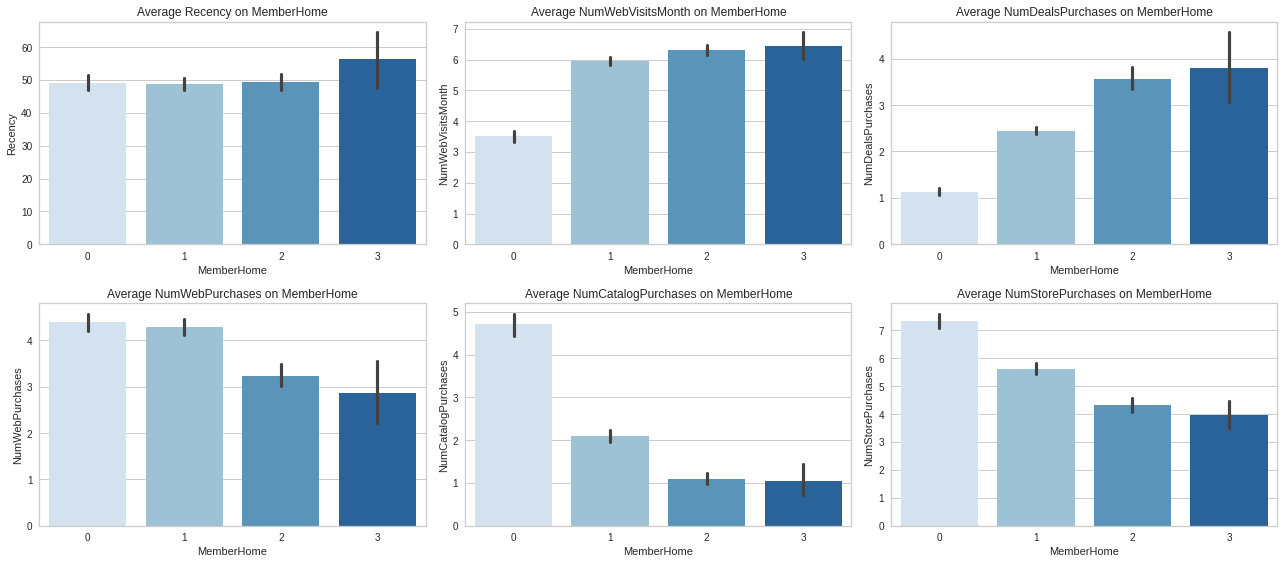

In [ ]:
plt.figure(figsize=(18,8))
for i in range(len(Purchase)):
  plt.subplot(2,3,i+1)
  sns.barplot(x=EdaDf['MemberHome'], y=EdaDf[Purchase[i]], 
              #hue=EdaDf['Response'],
              estimator=np.mean, palette='Blues')
  plt.title('Average ' + str(Purchase[i]) + ' on MemberHome')
  plt.tight_layout()

In [ ]:
MemberHomePurchase=round(EdaDf.groupby(['MemberHome'])[Purchase].
                         agg(['count', 'median', 'mean', 'std', 'min', 'max']),2)
MemberHomePurchase

Recency                              NumWebVisitsMonth         \
             count median   mean    std min max             count median   
MemberHome                                                                 
0              631   50.0  49.16  29.30   0  99               631    3.0   
1             1121   49.0  48.70  29.03   0  99              1121    6.0   
2              420   50.0  49.38  27.83   0  99               420    7.0   
3               53   61.0  56.38  31.71   0  98                53    7.0   

                        ... NumCatalogPurchases                \
            mean   std  ...                mean   std min max   
MemberHome              ...                                     
0           3.51  2.54  ...                4.71  2.97   0  11   
1           5.96  1.97  ...                2.10  2.34   0  11   
2           6.31  1.82  ...                1.10  1.35   0  10   
3           6.45  1.56  ...                1.06  1.43   0   6   

           NumStorePurchases                             
                       count median  mean   std min max  
MemberHome                                               
0                        631    7.0  7.34  3.23   0  13  
1                       1121    4.0  5.62  3.19   0  13  
2                        420    3.5  4.32  2.44   0  13  
3                         53    3.0  3.96  1.83   2  10  

[4 rows x 36 columns]

1. MemberHome 0-2 memiliki rat-rata recency yang cukup sama yaitu kurang lebih 50 hari. sedangkan MemberHome = 3 memiliki rata-rata recency yang cendrung lebih besar yaitu kurang lebih 60 hari
2. MemberHome yang lebih banyak memiliki nilai rata-rata NumWebVisitsMoth lebih tinggi
3. Semakin tinggi MemberHome, semakin tinggi pula nilai rata rata NumDealsPurchasenya.
4. MemberHome yang lebih kecil memiliki nilai rata-rata NumWebPurchases yang lebih tinggi
5. MemberHome = 0 memiliki nilai rata-rata NumCatalogPurchases lebih tinggi
6. MemberHome yang lebih sedikit memiliki nilai rata-rata NumStorePurchase lebih tinggi.


## Marital_Status

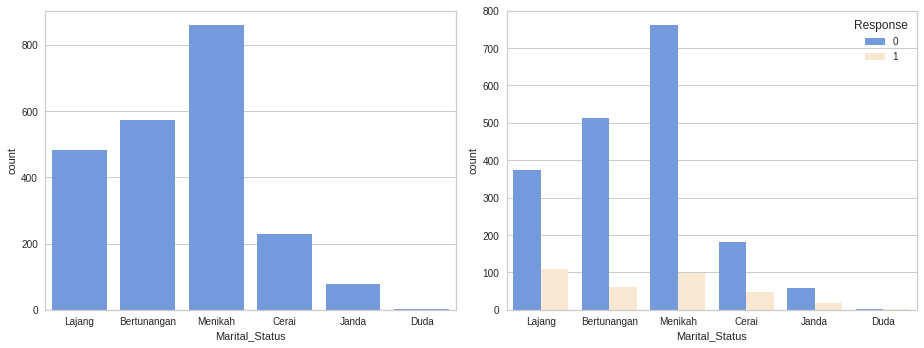

In [ ]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(x=EdaDf['Marital_Status'], color='#6495ED')
plt.subplot(1,2,2)
sns.countplot(x=EdaDf['Marital_Status'], hue=EdaDf['Response'], palette=['#6495ED', '#ffe9cb'])
plt.tight_layout()

1. Customer yang ada didominasi oleh customer yang telah menikah
2. Customer yang masih lajang atau sendiri memiliki rasio respon terhadap campaign lebih tinggi

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

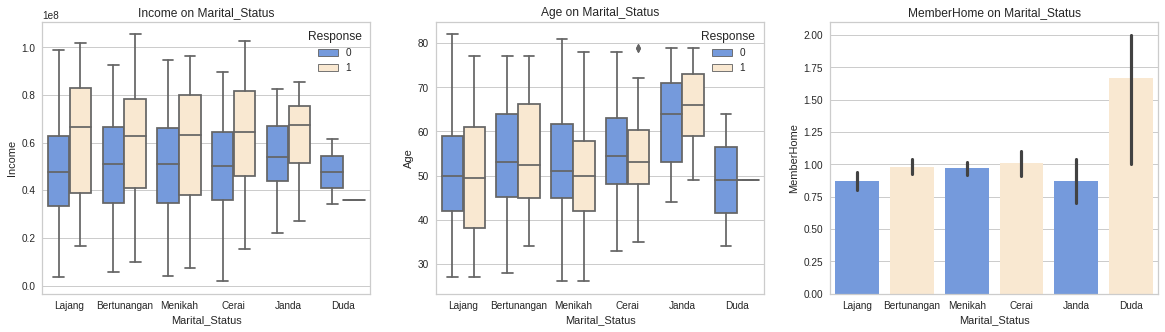

In [ ]:
plt.figure(figsize=(20,5))
# Income
plt.subplot(1,3,1)
sns.boxplot(x=EdaDf['Marital_Status'], 
            y=EdaDf['Income'], 
            hue=EdaDf['Response'], 
            palette=['#6495ED', '#ffe9cb'])
plt.title('Income on Marital_Status')
#Age
plt.subplot(1,3,2)
sns.boxplot(x=EdaDf['Marital_Status'], 
            y=EdaDf['Age'], 
            hue=EdaDf['Response'], 
            palette=['#6495ED', '#ffe9cb'])
plt.title('Age on Marital_Status')
#MemberHome
plt.subplot(1,3,3)
sns.barplot(x=EdaDf['Marital_Status'], 
            y=EdaDf['MemberHome'], 
            #hue=EdaDf['Response'],
            palette=['#6495ED', '#ffe9cb'])
plt.title('MemberHome on Marital_Status')
plt.tight_layout

a. Income
  1. Status pernikahan tidak menggambarkan income dari customer
  2. Income yang lebih tinggi pada semua status pernikahan  cendrung respon terhadap campaign kecuali pada status pernikahan duda

b. Age
  1. Umur pada status pernikahan cerai memiliki umur yang relatif lebih tua dibandingkan yang lainnya
  2. Kategori umur yang lebih tua atau muda pada status pernikahan tidak begitu menggambarkan terhadap Respon Campaign

c. MemberHome
  1. Rata-rata MemberHome pada semua status pernikahan kurang lebih = 1 kecuali pada status pernikahan duda

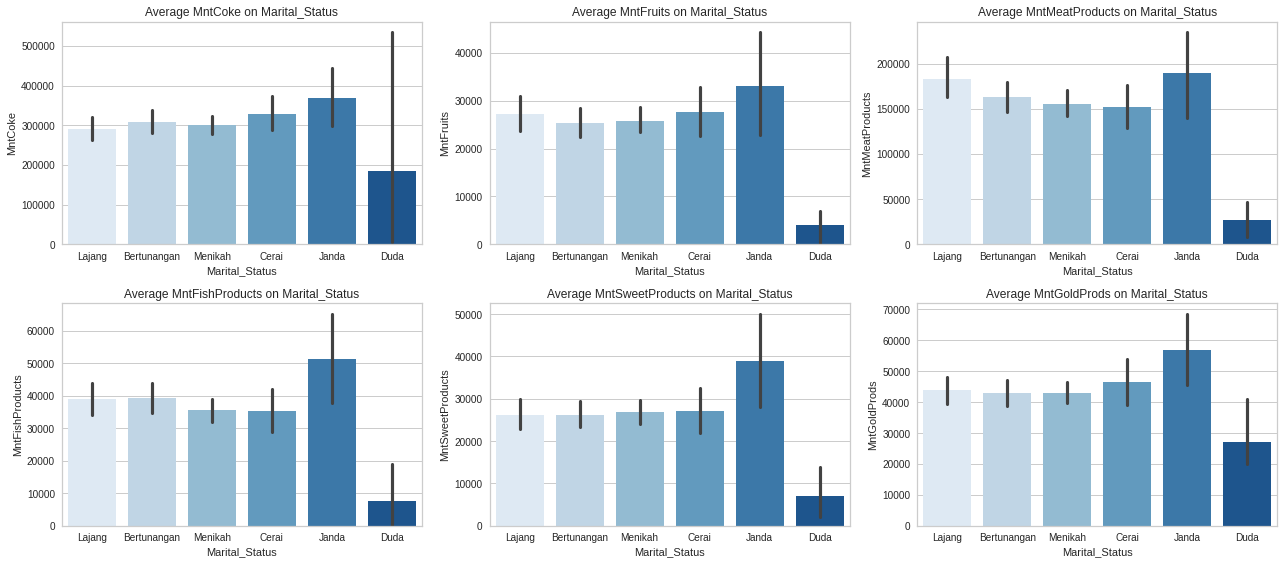

In [ ]:
# Marital_Status dan Mnt
plt.figure(figsize=(18,8))
for i in range(len(Mnt)):
  plt.subplot(2,3,i+1)
  sns.barplot(x=EdaDf['Marital_Status'], 
              y=EdaDf[Mnt[i]], 
              #hue=EdaDf['Response'], 
              estimator=np.mean,
              palette='Blues')
  plt.title('Average ' + str(Mnt[i]) + ' on Marital_Status')
  plt.tight_layout()

In [ ]:
MaritalStatusMnt=round(EdaDf.groupby(['Marital_Status'])[Mnt].
                       agg(['count', 'median', 'mean', 'std', 'min', 'max']),2)

MaritalStatusMnt

MntCoke                                                 \
                 count    median       mean        std   min      max   
Marital_Status                                                          
Bertunangan        574  188000.0  308428.57  334798.68     0  1492000   
Cerai              230  184000.0  327600.00  347338.32     0  1459000   
Duda                 3   15000.0  184666.67  302572.86  5000   534000   
Janda               77  332000.0  369272.73  333919.06  1000  1462000   
Lajang             481  157000.0  290509.36  332128.45     0  1332000   
Menikah            860  174000.0  300782.56  338223.04     0  1493000   

               MntFruits                               ... MntSweetProducts  \
                   count   median      mean       std  ...             mean   
Marital_Status                                         ...                    
Bertunangan          574   8000.0  25332.75  38519.54  ...         26271.78   
Cerai                230   8000.0  27634.78  40308.71  ...         27030.43   
Duda                   3   5000.0   4000.00   3605.55  ...          7000.00   
Janda                 77  12000.0  33090.91  47662.79  ...         39012.99   
Lajang               481   9000.0  27137.21  40600.57  ...         26253.64   
Menikah              860   7000.0  25831.40  39314.80  ...         26817.44   

                                       MntGoldProds                     \
                     std   min     max        count   median      mean   
Marital_Status                                                           
Bertunangan     39706.15     0  196000          574  24000.0  42975.61   
Cerai           41399.58     0  189000          230  25500.0  46578.26   
Duda             6245.00  2000   14000            3  20000.0  27000.00   
Janda           50816.36     0  191000           77  38000.0  56766.23   
Lajang          39064.82     0  198000          481  26000.0  43898.13   
Menikah         41195.13     0  197000          860  22000.0  43013.95   

                                         
                     std    min     max  
Marital_Status                           
Bertunangan     50325.53      0  241000  
Cerai           54709.00      0  242000  
Duda            12124.36  20000   41000  
Janda           53810.07      0  224000  
Lajang          50960.69      0  291000  
Menikah         51976.53      0  321000  

[6 rows x 36 columns]

1. Status pernikahan janda memiliki rata rata amount spent lebih banyak pada setiap product
2. Status pernikahan duda memiliki rata rata amount spent lebih sedikit pada setiap produk
3. Status pernikahan Lajang, Bertunangan, Menikah dan Cerai tidak memiliki nilai rata rata amount spent yang relatif sama

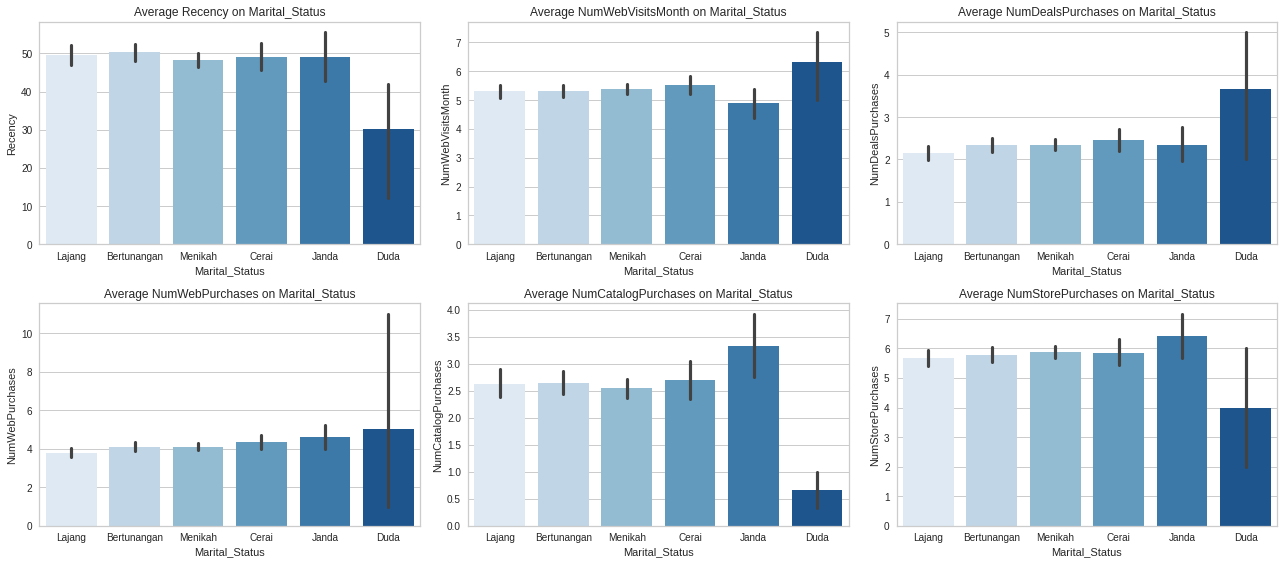

In [ ]:
plt.figure(figsize=(18,8))
for i in range(len(Purchase)):
  plt.subplot(2,3,i+1)
  sns.barplot(x=EdaDf['Marital_Status'], 
              y=EdaDf[Purchase[i]], 
              #hue=EdaDf['Response'], 
              estimator=np.mean,
              palette='Blues')
  plt.title('Average ' + str(Purchase[i]) + ' on Marital_Status')
  plt.tight_layout()

In [ ]:
MaritalStatusPurchase=round(EdaDf.groupby(['Marital_Status'])[Purchase].
                            agg(['count', 'median', 'mean', 'std', 'min', 'max']),2)

MaritalStatusPurchase


Recency                              NumWebVisitsMonth         \
                 count median   mean    std min max             count median   
Marital_Status                                                                 
Bertunangan        574   51.0  50.29  28.61   0  99               574    6.0   
Cerai              230   51.0  49.13  28.59   0  99               230    6.0   
Duda                 3   37.0  30.33  16.07  12  42                 3    6.0   
Janda               77   48.0  49.14  28.77   0  99                77    5.0   
Lajang             481   51.0  49.53  28.64   0  99               481    6.0   
Menikah            860   48.0  48.22  29.51   0  99               860    6.0   

                            ... NumCatalogPurchases                \
                mean   std  ...                mean   std min max   
Marital_Status              ...                                     
Bertunangan     5.30  2.43  ...                2.64  2.72   0  11   
Cerai           5.51  2.44  ...                2.69  2.80   0  11   
Duda            6.33  1.53  ...                0.67  0.58   0   1   
Janda           4.88  2.34  ...                3.32  2.80   0  11   
Lajang          5.30  2.56  ...                2.63  2.79   0  11   
Menikah         5.39  2.30  ...                2.55  2.71   0  11   

               NumStorePurchases                             
                           count median  mean   std min max  
Marital_Status                                               
Bertunangan                  574    5.0  5.78  3.21   0  13  
Cerai                        230    5.0  5.86  3.31   0  13  
Duda                           3    4.0  4.00  2.00   2   6  
Janda                         77    6.0  6.42  3.28   2  13  
Lajang                       481    5.0  5.68  3.23   0  13  
Menikah                      860    5.0  5.88  3.24   0  13  

[6 rows x 36 columns]

1. Rata rata recency pada status pernikahan duda relatif lebih kecil dibandingkan yang lainnya
2. Rata rata jumlah visit web pada status pernikahan duda relatif lebih tinggi dibandingkan yang lainnya
3. Secara keseluruhan customer pada semua status pernikahan memiliki rata rata relatif lebih banyak purchase pada store
4. Customer dengan status pernikahan duda memiliki rata-rata puchase lebih tinggi melalui deals dan web tetapi lebih rendah melalui catalog dan store dibandingkan yang lainnya
5. Customer dengan status pernikahan janda memiliki rata rata purchase melalui catalog lebih tinggi dibandingkan lainnya

## Education

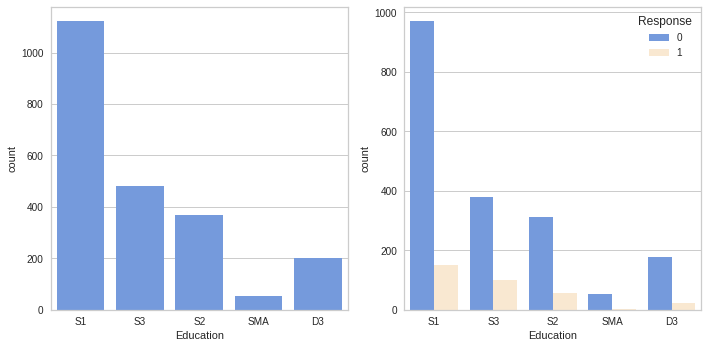

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=EdaDf['Education'], color='#6495ED')
plt.subplot(1,2,2)
sns.countplot(x=EdaDf['Education'], hue=EdaDf['Response'], palette=['#6495ED','#ffe9cb'])
plt.tight_layout()

1. Diketahui mayoritas customer berpendidikan s1
2. Rasio Respon terhadap campaign terbanyak terdapat pada golongan S3 dan S2

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

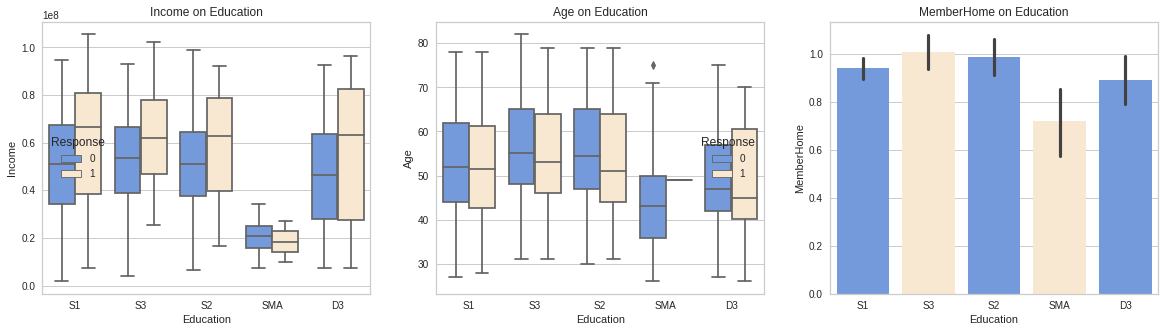

In [ ]:
plt.figure(figsize=(20,5))
# Income
plt.subplot(1,3,1)
sns.boxplot(x=EdaDf['Education'], y=EdaDf['Income'], 
            hue=EdaDf['Response'], palette=['#6495ED','#ffe9cb'])
plt.title('Income on Education')
#Age
plt.subplot(1,3,2)
sns.boxplot(x=EdaDf['Education'], y=EdaDf['Age'], 
            hue=EdaDf['Response'], palette=['#6495ED','#ffe9cb'])
plt.title('Age on Education')
#MemberHome
plt.subplot(1,3,3)
sns.barplot(x=EdaDf['Education'], y=EdaDf['MemberHome'], 
            #hue=EdaDf['Response'], 
            palette=['#6495ED','#ffe9cb'])
plt.title('MemberHome on Education')
plt.tight_layout

a. Income 
  1. Customer dengan pendidikan SMA diketahui memiliki Income paling rendah dibandingkan yang lainnya
  2. Income pada customer dengan pendidikan S1 memiliki rentang kisaran yang lebih panjang dibandingkan yang lainnya
  3. Pendidikan dengan Income yang lebih tinggi cendrung Respon terhadap campaign terkecuali pada pendidikan SMA

b. Age 
  1. Customer dengan pendidikan SMA memiliki umur yang relatif lebih muda dibandingkan yang lainnya
  2. Pada tingkat pendidikan S1-S3 dengan umur yang relatif lebih muda cendrung untuk Respon terhadap campaigin  

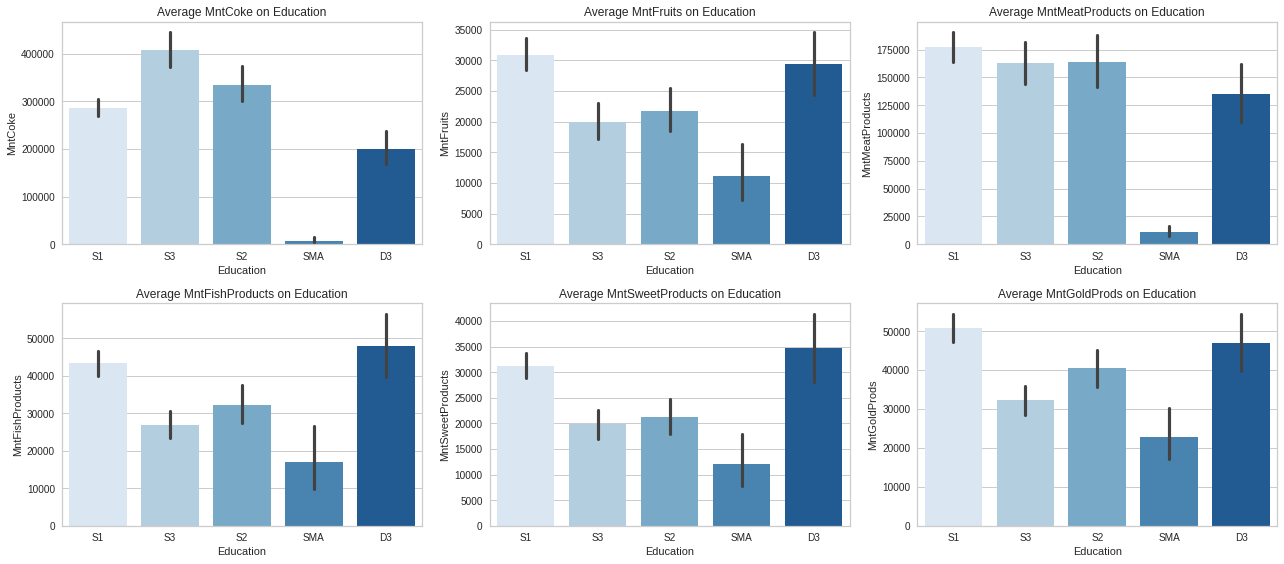

In [ ]:
# Education dan Mnt
plt.figure(figsize=(18,8))
for i in range(len(Mnt)):
  plt.subplot(2,3,i+1)
  sns.barplot(x=EdaDf['Education'], 
              y=EdaDf[Mnt[i]], 
              #hue=EdaDf['Response'], 
              estimator=np.mean,
              palette='Blues')
  plt.title('Average ' + str(Mnt[i]) + ' on Education')
  plt.tight_layout()

In [ ]:
MaritalStatusMnt=round(EdaDf.groupby(['Education'])[Mnt].agg(['count', 'median', 'mean', 'std', 'min', 'max']),2)

MaritalStatusMnt

MntCoke                                                MntFruits  \
            count    median       mean        std   min      max     count   
Education                                                                    
D3            200   51000.0  200880.00  262495.30     0  1215000       200   
S1           1122  184500.0  285520.50  308326.50     0  1492000      1122   
S2            369  179000.0  333872.63  354248.73  2000  1486000       369   
S3            480  288500.0  407629.17  390577.54  4000  1493000       480   
SMA            54    2000.0    7240.74   30763.21     0   228000        54   

                                        ... MntSweetProducts                \
            median      mean       std  ...             mean       std min   
Education                               ...                                  
D3         13000.0  29350.00  38892.81  ...         34725.00  49089.49   0   
S1         10000.0  30896.61  44166.18  ...         31269.16  43929.54   0   
S2          6000.0  21710.03  34857.94  ...         21233.06  34631.68   0   
S3          4000.0  19954.17  32429.37  ...         19781.25  32589.62   0   
SMA         7000.0  11111.11  17747.35  ...         12111.11  19802.48   0   

                  MntGoldProds                                             
              max        count   median      mean       std   min     max  
Education                                                                  
D3         194000          200  28000.0  46850.00  53164.08     0  246000  
S1         198000         1122  29000.0  50739.75  56007.71     0  321000  
S2         179000          369  20000.0  40485.09  46774.85     0  262000  
S3         182000          480  16500.0  32225.00  42783.47     0  291000  
SMA        129000           54  15000.0  22833.33  24523.19  2000  144000  

[5 rows x 36 columns]

1. Customer dengan pendidikan sma cendrung spent paling rendah pada semua product, hal ini berkaitan juga dengan incomenya yang lebih rendah daripada yang lainnya
2. Customer dengan pendidikan s3 memiliki amount spent paling tinggi pada product coke dengan rata-rata nilai kurang lebih 400.000
3. Customer dengan pendidikan S1 dan D3 memiliki amount spent paling tinggi pada product fruit, fish, sweet dan gold
4. Customer dengan pendidikan S2 memiliki rata-rata nilai amount spent yang selalu berada ditengah tengah yang lainnya
5. Pada product meat, customer dengan pendidikan S1, S2 dan S3 memiliki rata-rata nilai amount spent yang saling berdekatan

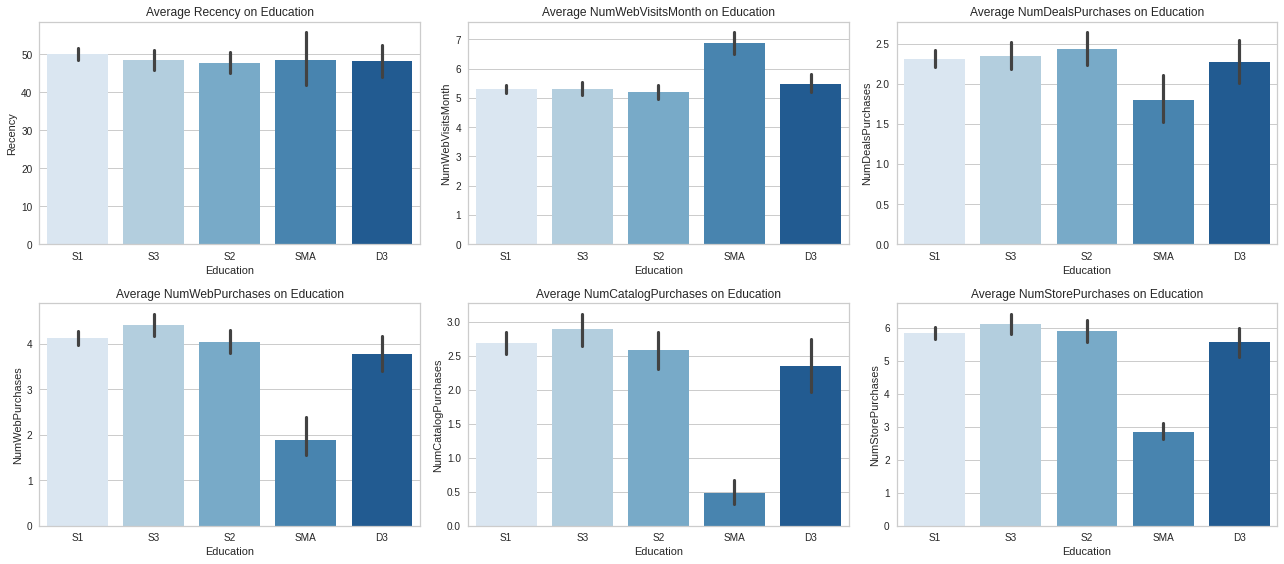

In [ ]:
# Education dan Purchase
plt.figure(figsize=(18,8))
for i in range(len(Purchase)):
  plt.subplot(2,3,i+1)
  sns.barplot(x=EdaDf['Education'], 
              y=EdaDf[Purchase[i]], 
              #hue=EdaDf['Response'], 
              estimator=np.mean,
              palette='Blues')
  plt.title('Average ' + str(Purchase[i]) + ' on Education')
  plt.tight_layout()

In [ ]:
EducationPurchase=round(EdaDf.groupby(['Education'])[Purchase].agg(['count', 'median', 'mean', 'std', 'min', 'max']),2)
EducationPurchase

Recency                              NumWebVisitsMonth               \
            count median   mean    std min max             count median  mean   
Education                                                                       
D3            200   44.5  48.27  30.20   0  99               200    6.0  5.49   
S1           1122   50.5  50.10  28.83   0  99              1122    6.0  5.30   
S2            369   49.0  47.62  29.38   0  98               369    6.0  5.19   
S3            480   49.5  48.51  28.66   0  99               480    5.0  5.32   
SMA            54   48.0  48.44  26.65   2  94                54    7.0  6.87   

                 ... NumCatalogPurchases               NumStorePurchases  \
            std  ...                mean   std min max             count   
Education        ...                                                       
D3         2.21  ...                2.35  2.76   0  10               200   
S1         2.42  ...                2.69  2.77   0  11              1122   
S2         2.33  ...                2.58  2.59   0  11               369   
S3         2.55  ...                2.89  2.83   0  11               480   
SMA        1.45  ...                0.48  0.67   0   2                54   

                                      
          median  mean   std min max  
Education                             
D3           4.0  5.56  3.17   2  13  
S1           5.0  5.85  3.24   0  13  
S2           5.0  5.91  3.20   1  13  
S3           5.0  6.12  3.28   0  13  
SMA          3.0  2.85  0.96   2   8  

[5 rows x 36 columns]

1. Rata rata Recency customer semua kategori pendidikan memiliki nilai yang relatif sama yaitu 50 hari
2. Customer dengan kategori pendidikan SMA memiliki rata rata purchase lebih rendah dibandingkan yang lainnya
3. Secara keseluruhan customer pada semua kategori pendidikan memiliki rata rata relatif lebih banyak purchase pada store

# Model Preparation

Setelah melakukan exploratory kita perlu melakukan data preprocessing kembali untuk membuat model. beberapa langkah yang dilakukan dalam preprocessing ini diantaranya yaitu: Membuang kolom yang tidak akan kita jadikan feature, mengubah semua data menjadi integer dengan melakukan encoding pada data yang bersifat kategorik dan melakukan scaling pada data agar sebarannya relatif sama

In [ ]:
# Menduplikat data untuk keperluan preparation
PreModel = EdaDf.copy()

In [ ]:
# Drop columns yang tidak akan dijadikan feature
PreModel = PreModel.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp3',
                                    'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'])

In [ ]:
# Split kolom numerikal dan kolom kategorikal
num = EdaDf.select_dtypes('number').columns.tolist()
cat = EdaDf.select_dtypes('object').columns.tolist()
print(num)
print(cat)

['ID', 'Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'MemberHome', 'YearJoin']
['Education', 'Marital_Status']


In [ ]:
# Mengecek kembali value yang ada pada kolom kategorik
for col in range(len(cat)):
  print('value count pada kolom '+ str(cat[col]))
  print(PreModel[cat[col]].value_counts())
  print('-'*50)

value count pada kolom Education
S1     1122
S3      480
S2      369
D3      200
SMA      54
Name: Education, dtype: int64
--------------------------------------------------
value count pada kolom Marital_Status
Menikah        860
Bertunangan    574
Lajang         481
Cerai          230
Janda           77
Duda             3
Name: Marital_Status, dtype: int64
--------------------------------------------------


In [ ]:
# Label Encoding
map_Education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4}
PreModel['Education'] = PreModel['Education'].map(map_Education)

In [ ]:
# One hot encoding
onehots = pd.get_dummies(PreModel['Marital_Status'], prefix='Marital_Status')
PreModel = PreModel.join(onehots)
# Drop columns
PreModel = PreModel.drop(columns = ['Marital_Status'])
#Melihat sampel data
PreModel.sample(3)

,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Age,MemberHome,YearJoin,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
1246,0,7500000.0,63,10000,17000,18000,8000,26000,40000,4,...,0,30,1,2012,0,0,0,0,1,0
1945,2,70792000.0,82,344000,45000,654000,104000,11000,114000,2,...,0,71,0,2013,0,0,0,1,0,0
305,3,80950000.0,44,525000,147000,112000,219000,147000,63000,1,...,0,61,0,2013,0,0,0,0,0,1


In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(PreModel)
PreModel = pd.DataFrame(scaler.transform(PreModel),columns= PreModel.columns )
PreModel.head(3)

,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Age,MemberHome,YearJoin,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,-0.457696,0.317527,0.306111,0.978390,1.548808,1.778374,2.454325,1.497489,0.851190,0.364018,...,2.379428,1.016072,-1.267135,-1.500379,-0.589634,-0.339541,-0.036744,-0.189334,1.904148,-0.793748
1,-0.457696,-0.256486,-0.384832,-0.874576,-0.638392,-0.736090,-0.652473,-0.637299,-0.735767,-0.169188,...,-0.420269,1.272587,1.392653,1.420306,-0.589634,-0.339541,-0.036744,-0.189334,1.904148,-0.793748
2,-0.457696,0.973355,-0.799398,0.357765,0.568339,-0.172664,1.339533,-0.146543,-0.039054,-0.702395,...,-0.420269,0.332029,-1.267135,-0.040036,1.695968,-0.339541,-0.036744,-0.189334,-0.525169,-0.793748


# Dimentional Reduction

In [ ]:
#Dimentional Reduction
pca = PCA(n_components=3, random_state=42)
pca.fit(PreModel)
PCA_PreModel = pd.DataFrame(pca.transform(PreModel), columns=(["col1","col2", "col3"]))
PCA_PreModel.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2225.0,6.067556e-17,2.535031,-5.484074,-2.289407,-0.751473,2.194069,6.845042
col2,2225.0,-1.021904e-16,1.407777,-3.117902,-1.017064,-0.233956,0.872357,5.496146
col3,2225.0,-5.269193e-17,1.242463,-3.326174,-0.864198,-0.106600,0.803705,4.971489


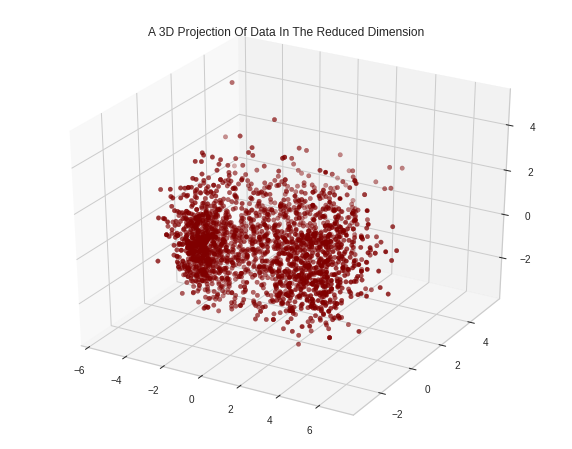

In [ ]:
# 3D Projection dari Data yang telah direduksi
x =PCA_PreModel["col1"]
y =PCA_PreModel["col2"]
z =PCA_PreModel["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

Elbow Method to determine the number of clusters to be formed:


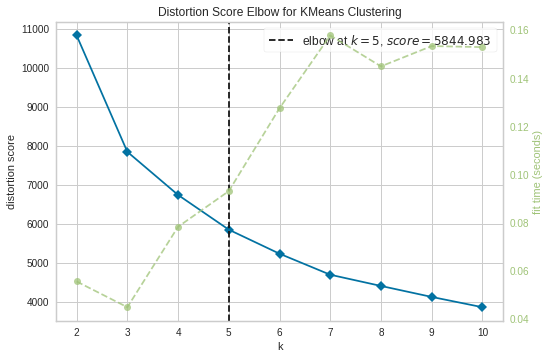

In [ ]:
# Pemeriksaan cepat dengan metode elbow untuk menemukan jumlah cluster yang akan dibuat.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10, random_state=42)
Elbow_M.fit(PCA_PreModel)
Elbow_M.show()

In [ ]:
# Inisiasi Model
AC = AgglomerativeClustering(n_clusters=5)

# fit model dan predict clusters
yhat_AC = AC.fit_predict(PCA_PreModel)
PCA_PreModel["Clusters"] = yhat_AC

# Masukan hasil Cluster ke data yang sudah dibersihkan
CleanDf["Clusters"]= yhat_AC

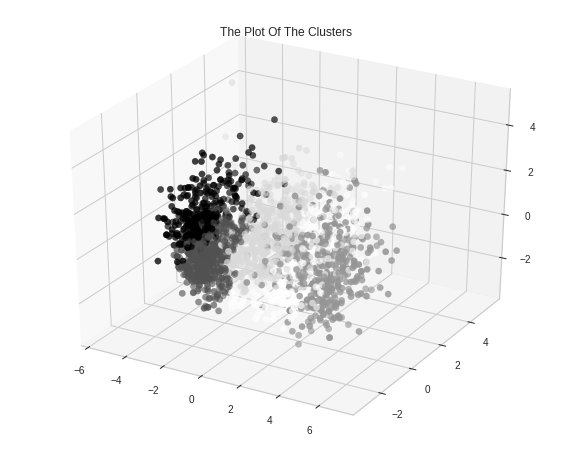

In [ ]:
# Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_PreModel["Clusters"], marker='o', )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluation

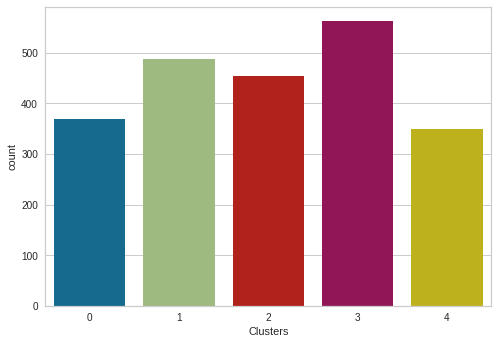

In [ ]:
# Melihat jumlah masing masing cluster yang di buat
sns.countplot(x=CleanDf['Clusters'])

Cluster terlihat terdistribusi cukup merata

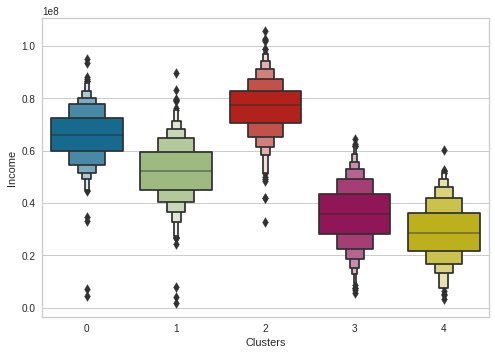

In [ ]:
# Melihat perbandingan income antar cluster
sns.boxenplot(x=CleanDf['Clusters'], y=CleanDf['Income'])

1. Cluster 0 : Middle up income
2. Cluster 1 : Middle income
3. cluster 2 : High income
4. Cluster 3 : Middle down income
5. Cluster 4 : Low low income

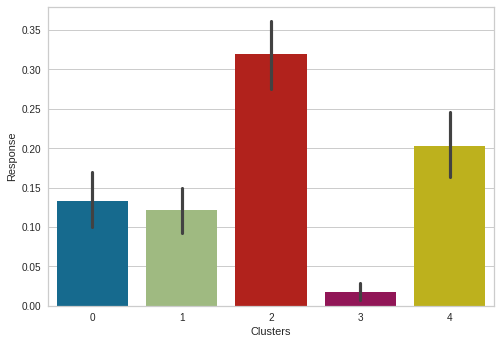

In [ ]:
# Melihat respon masing masing cluster pada campaign terakhir
sns.barplot(x=CleanDf['Clusters'], y=CleanDf['Response'])

1. Cluster 0 : Memiliki response yang cukup untuk campaign terakhir
2. Cluster 1 : Memiliki response yang cukup untuk campaign terakhir
3. Cluster 2 : Memiliki Respon yang sangat bagus untuk campaign terakhir
4. Cluster 3 : Memiliki respon yang buruk untuk campaign terakhir
5. Cluster 4 : Memiliki respon yang bagus untuk campaign terakhir 



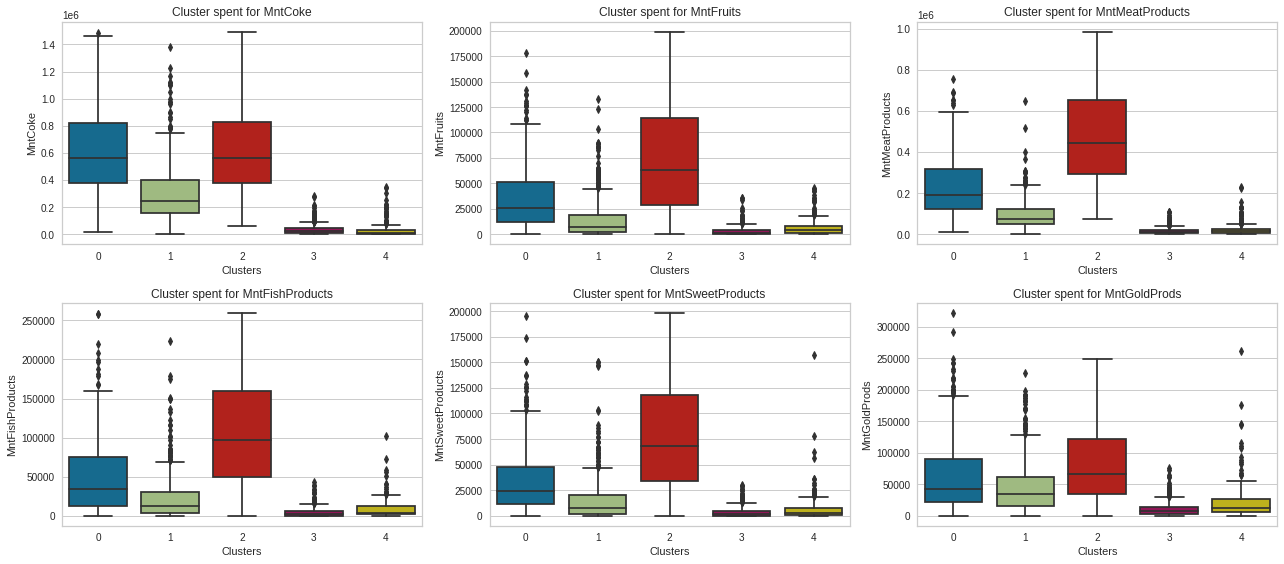

In [ ]:
# Melihat pola uang yang di belanjakan untuk pembelian produk pada masing masing produk
plt.figure(figsize=(18,8))
for i in range(len(Mnt)):
  plt.subplot(2,3,i+1)
  sns.boxplot(x=CleanDf['Clusters'], 
              y=CleanDf[Mnt[i]])
  plt.title('Cluster spent for ' + str(Mnt[i]))
  plt.tight_layout()

Dari plot diatas terlihat bahwa cluster 2 adalah kumpulan pelanggan yang potensi untuk spent paling banyak diikuti oleh cluster 0, 1, 4 dan 3

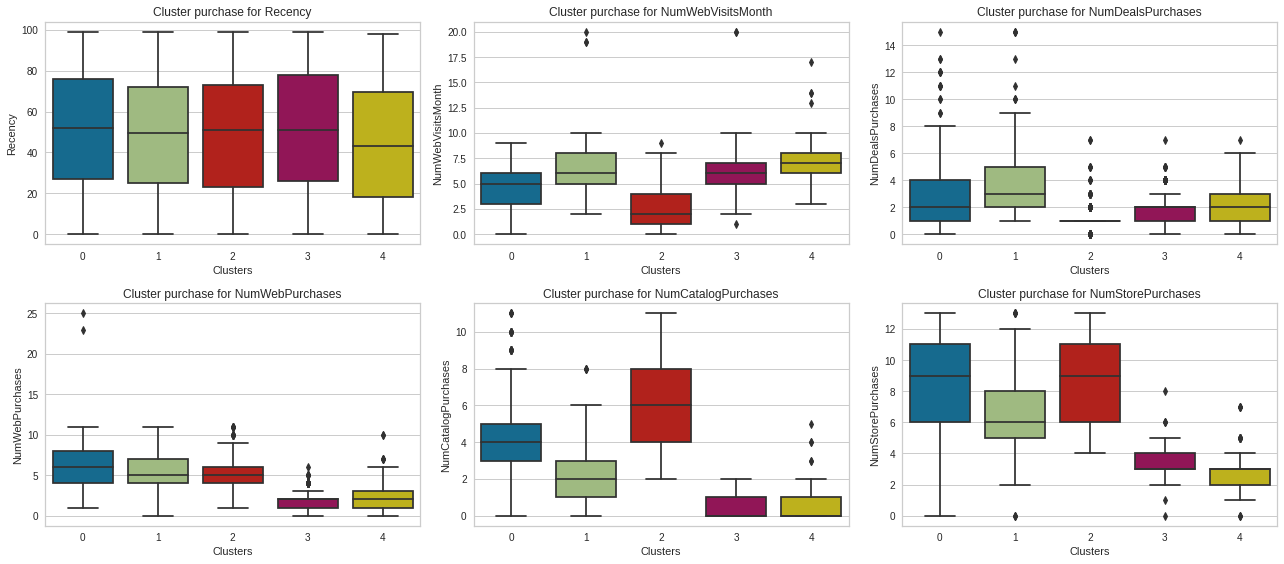

In [ ]:
# Melihat prilaku customer dalam membeli produk
plt.figure(figsize=(18,8))
for i in range(len(Purchase)):
  plt.subplot(2,3,i+1)
  sns.boxplot(x=CleanDf['Clusters'], 
              y=CleanDf[Purchase[i]])
  plt.title('Cluster purchase for ' + str(Purchase[i]))
  plt.tight_layout()

Dari plot ini kita dapat melihat pola pembelian dari masing masing cluster. Diketahi bahwa Cluster 2 selaku pelanggan potensial banyak berbelanja melalui store serta catalog dan tidak suka untuk mengikuti program deals. Program deals cocok untuk cluster 1 dan dapat memancing cluster 4 berbelanja. Dengan bigini kita dapat membuat strategi pemasaran untuk masing masing cluster

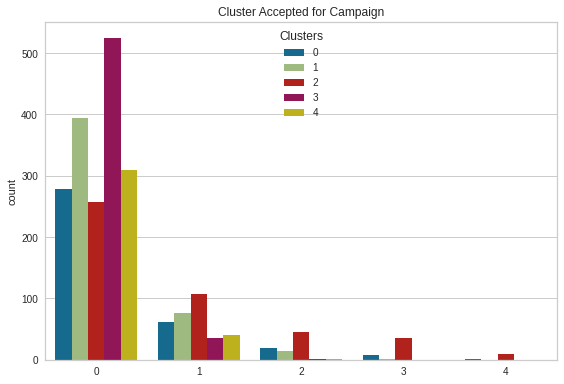

In [ ]:
# Melihat respon customer pada masing masing cluster terhadap campaign sebelumnya
sns.countplot(hue=CleanDf['Clusters'], 
            x=CleanDf['AcceptedCmp1']+CleanDf['AcceptedCmp2']+
            CleanDf['AcceptedCmp3']+CleanDf['AcceptedCmp4']+
            CleanDf['AcceptedCmp5'])
plt.title('Cluster Accepted for Campaign')
plt.tight_layout()

Sejauh ini penerimaan campaign masih cendrung buruk, hanya cluster 4 dan 1 saja yang dapat menerima hingga 4 campaign dan itupun jumlahnya sangat kecil. Dengan ini perlu adanya membuat campaign dengan sasaran yang tepat 

# Profilling

<Figure size 576x396 with 0 Axes>

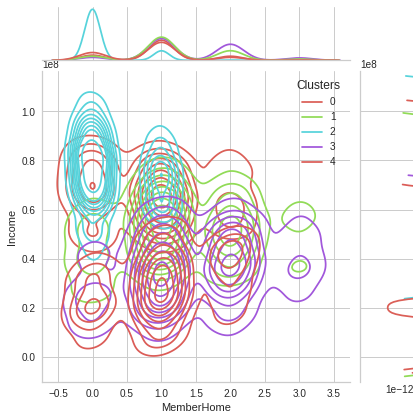

<Figure size 576x396 with 0 Axes>

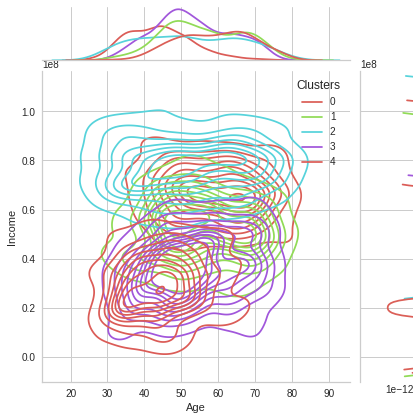

<Figure size 576x396 with 0 Axes>

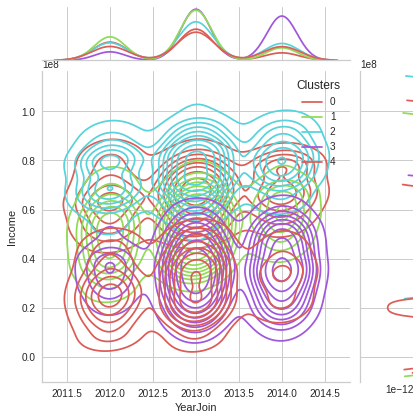

In [ ]:
Personal = [ 'MemberHome', 'Age', 'YearJoin']
for i in Personal:
    plt.figure()
    sns.jointplot(x=CleanDf[i], y=CleanDf["Income"], hue =CleanDf["Clusters"], kind="kde", palette='hls')
    plt.show()

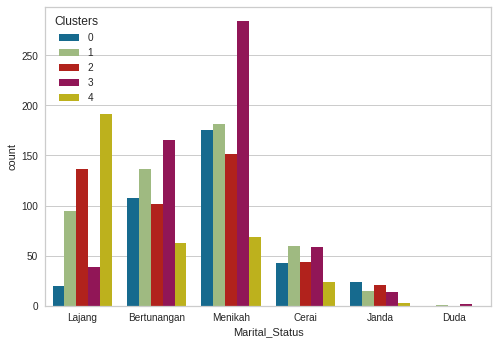

In [ ]:
# Marital Status
sns.countplot(x=CleanDf['Marital_Status'], hue=CleanDf['Clusters'])

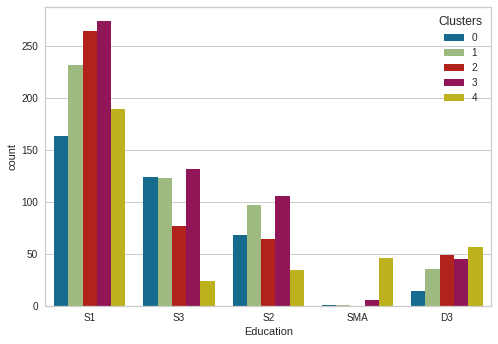

In [ ]:
# Education
sns.countplot(x=CleanDf['Education'], hue=CleanDf['Clusters'])

Cluster 0
  1. Income menengah keatas, mayoritas dikisaran 600.000-750.000
  2. Relatif lebih tua
  3. Memiliki tanggungan anak mayoritas 1 orang dengan maksimal sebanyak 2 orang
  4. Sedikit yang lajang, mayoritas yang sudah bertunangan atau menikah
  5. Kemungkian kecil SMA atau D3

Cluster 1
  1. Income menengah, mayoritas dikisaran 450.000-600.000 
  2. Umur relatif pada rata rata
  3. Memiliki tanggungan anak mayoritas 1 orang dengan maksimal sebanyak 3 orang
  4. Marital_Status terdistribusi merata
  5. Kemungkinan kecil SMA

Cluster 2
  1. Income tinggi, mayoritas pada kisaran 750.000-850.000
  2. Maksimal memiliki 1 tanggungan anak tetapi mayoritas tidak memiliki tanggungan anak
  3. Mencakup semua umur
  4. Marital_Status terdistribusi merata
  5. Tidak ada yang SMA

Cluster 3
  1. Income menengah kebawah, mayoritas pada kisaran 300.000-450.000
  2. Umur relatif pada rata rata
  3. Jumlah tanggungan 0-3 anak dengan mayoritas 1 hingga 2 anak
  4. Mayoritas menikah atau bertunangan
  5. Kemungkinan kecil SMA

Cluster 4
  1. Bottom Income, majority in range 100.000-450.000
  2. Relatif masih muda
  3. Memiliki tanggungan 0-2 anak dengan mayoritas 1 anak
  4. Mayoritas adalah lajang
  5. Kemungkinan kecil S3

# **Terimakasih Telah Membaca 😀**



